In [1]:
#include packages
import pandas as pd
import geopandas as gpd #geopandas for dataframes with spatial info
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt #for creating plots

import os 
import seaborn as sns #for styling the plots
import statsmodels.formula.api as smf
import warnings
import urllib.request
warnings.filterwarnings('ignore')
%matplotlib inline 

In [3]:
bike = pd.read_csv('/mnt/c/Users/Smriti/Desktop/1st Sem_Spring/Data Dive/citibike_chronological_dataset.csv')
bike.head()

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration
0,2019,1,1,0,133,1.034025,7.179412
1,2019,1,1,1,311,1.975756,15.400700
2,2019,1,1,2,355,2.119052,16.676541
3,2019,1,1,3,251,1.213358,10.979902
4,2019,1,1,4,153,0.836879,6.104062


In [4]:
bike.shape

(17544, 7)

In [5]:
bike2019 = bike[bike['year']==2019]
bike2019.head()

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration
0,2019,1,1,0,133,1.034025,7.179412
1,2019,1,1,1,311,1.975756,15.400700
2,2019,1,1,2,355,2.119052,16.676541
3,2019,1,1,3,251,1.213358,10.979902
4,2019,1,1,4,153,0.836879,6.104062


In [6]:
bike2019.shape

(8760, 7)

In [8]:
bike2020 = bike[bike['year']==2020]
bike2020.shape

(8784, 7)

In [9]:
bike2019riders = bike2019[['month','concurrent_riders']].groupby(by=['month']).sum()
bike2019riders

,concurrent_riders
month,
1,1170587
2,1149919
3,1639834
4,2272255
5,2471581
6,2749428
7,2794084
8,3003974
9,3109730


In [10]:
bike2020riders = bike2020[['month','concurrent_riders']].groupby(by=['month']).sum()
bike2020riders

,concurrent_riders
month,
1,1503808
2,1391630
3,1400558
4,975525
5,2152287
6,2725854
7,3000021
8,3219417
9,3397792


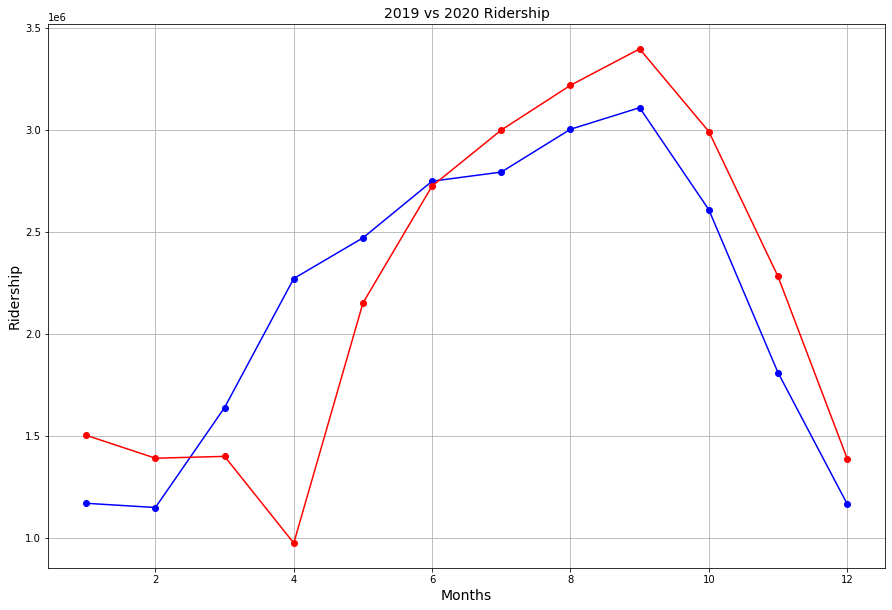

In [51]:
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(bike2019riders['concurrent_riders'], 'b', bike2020riders['concurrent_riders'], 'r', marker='o')
plt.title('2019 vs 2020 Ridership', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Ridership', fontsize=14)
plt.grid(True)
plt.show()

In [45]:
bike2019dist = bike2019[['month','avg_distance']].groupby(by=['month']).mean()
bike2019dist

,avg_distance
month,
1,8.602872
2,4.252858
3,6.886725
4,5.103282
5,2.422698
6,4.526279
7,3.872341
8,4.158658
9,6.967841


In [46]:
bike2020dist = bike2020[['month','avg_distance']].groupby(by=['month']).mean()
bike2020dist

,avg_distance
month,
1,3.971028
2,5.282464
3,18.642097
4,13.409196
5,4.137176
6,4.242623
7,2.295222
8,5.532244
9,5.016196


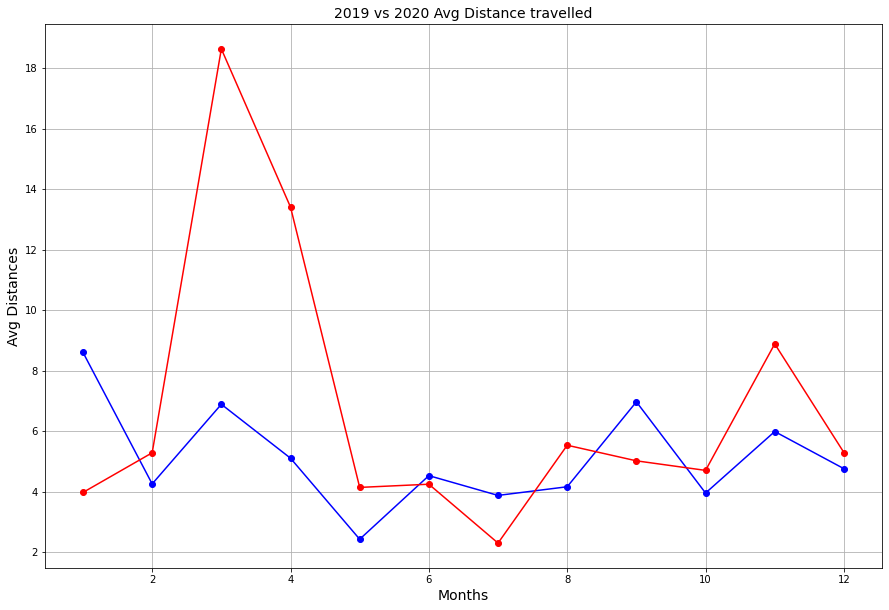

In [47]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(bike2019dist['avg_distance'], 'b', bike2020dist['avg_distance'], 'r', marker='o')
plt.title('2019 vs 2020 Avg Distance travelled', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Avg Distances', fontsize=14)
plt.grid(True)
plt.show()

In [52]:
bike2019durn = bike2019[['month','avg_trip_duration']].groupby(by=['month']).mean()
bike2019durn

,avg_trip_duration
month,
1,70.636125
2,35.341098
3,59.676099
4,50.299411
5,23.331488
6,44.920707
7,36.736819
8,39.476562
9,64.000440


In [53]:
bike2020durn = bike2020[['month','avg_trip_duration']].groupby(by=['month']).mean()
bike2020durn

,avg_trip_duration
month,
1,31.786809
2,43.073829
3,187.733099
4,172.251778
5,50.834728
6,52.358536
7,28.549182
8,60.613314
9,53.297124


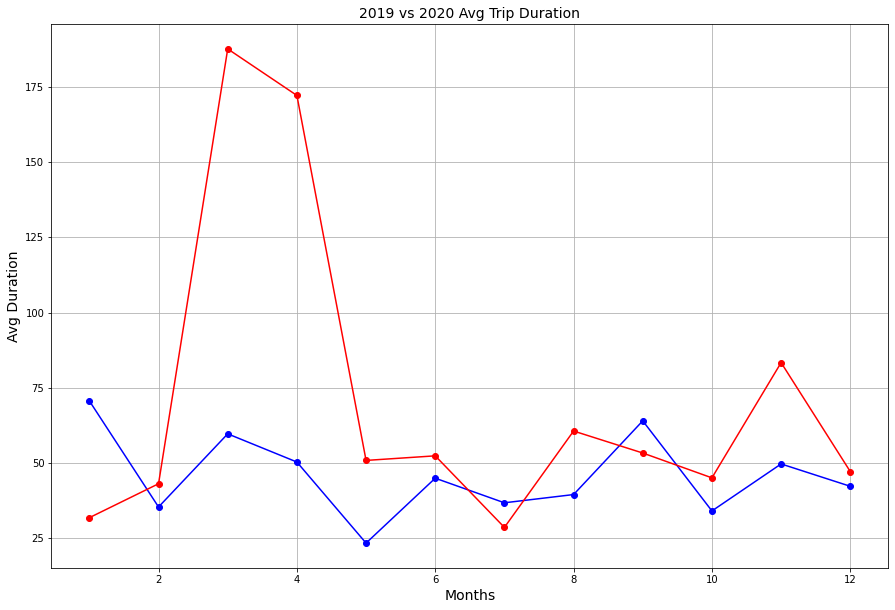

In [54]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
plt.plot(bike2019durn['avg_trip_duration'], 'b', bike2020durn['avg_trip_duration'], 'r', marker='o')
plt.title('2019 vs 2020 Avg Trip Duration', fontsize=14)
plt.xlabel('Months', fontsize=14)
plt.ylabel('Avg Duration', fontsize=14)
plt.grid(True)
plt.show()

In [55]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf

In [157]:
#bike2019['date'] = pd.to_datetime(bike2019['year'].astype(str)  + "-" + bike2019['month'].astype(str) + "-" + bike2019['day'].astype(str), format='%Y%B')
bike2019['date'] = pd.to_datetime((bike2019.year*10000 + bike2019.month*100 + bike2019.day).apply(str),format='%Y%m%d')
bike2019.tail()

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration,date
8755,2019,12,31,19,1525,3.993708,51.067656,2019-12-31
8756,2019,12,31,20,1004,2.406906,27.707759,2019-12-31
8757,2019,12,31,21,733,2.127559,84.867458,2019-12-31
8758,2019,12,31,22,747,2.107485,19.626089,2019-12-31
8759,2019,12,31,23,616,1.583798,27.332542,2019-12-31


In [158]:
bike2020['date'] = pd.to_datetime((bike2020.year*10000 + bike2020.month*100 + bike2020.day).apply(str),format='%Y%m%d')
bike2020.tail()

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration,date
17539,2020,12,31,19,1922,4.937460,40.455344,2020-12-31
17540,2020,12,31,20,1349,3.177900,34.757793,2020-12-31
17541,2020,12,31,21,1044,2.661514,44.116253,2020-12-31
17542,2020,12,31,22,915,2.370083,25.325859,2020-12-31
17543,2020,12,31,23,768,1.780822,22.382061,2020-12-31


In [167]:
bikebyday2019 = bike2019[['date','month','concurrent_riders','avg_distance','avg_trip_duration']].groupby(['month','date'], as_index=False).agg({'concurrent_riders':'sum','avg_distance':'mean','avg_trip_duration':'mean'}).rename(columns={'concurrent_riders':'riders','avg_distance':'avg_dist','avg_trip_duration':'avg_duration'})
bikebyday2019

,month,date,riders,avg_dist,avg_duration
0,1,2019-01-01,28015,6.255508,75.355103
1,1,2019-01-02,46050,11.039658,86.125280
2,1,2019-01-03,50111,12.350747,93.576937
3,1,2019-01-04,53117,12.740265,99.725289
4,1,2019-01-05,21243,4.380725,41.274390
...,...,...,...,...,...
360,12,2019-12-27,39676,5.086305,51.646721
361,12,2019-12-28,36843,4.598970,49.194887
362,12,2019-12-29,23349,2.693326,33.206146
363,12,2019-12-30,15363,1.670656,14.353736


In [168]:
bikebyday2020 = bike2020[['date','month','concurrent_riders','avg_distance','avg_trip_duration']].groupby(['month','date'], as_index=False).agg({'concurrent_riders':'sum','avg_distance':'mean','avg_trip_duration':'mean'}).rename(columns={'concurrent_riders':'riders','avg_distance':'avg_dist','avg_trip_duration':'avg_duration'})
bikebyday2020

,month,date,riders,avg_dist,avg_duration
0,1,2020-01-01,22442,1.646043,17.748257
1,1,2020-01-02,50350,4.218060,35.368497
2,1,2020-01-03,38356,3.073608,25.295017
3,1,2020-01-04,35783,2.775982,25.629675
4,1,2020-01-05,33664,2.526721,22.951474
...,...,...,...,...,...
361,12,2020-12-27,31200,3.526245,34.855108
362,12,2020-12-28,49799,5.936250,50.964725
363,12,2020-12-29,42120,4.909789,40.025967
364,12,2020-12-30,44995,5.258672,42.727970


In [169]:
bikebyday = pd.concat([bikebyday2019,bikebyday2020])
bikebyday

,month,date,riders,avg_dist,avg_duration
0,1,2019-01-01,28015,6.255508,75.355103
1,1,2019-01-02,46050,11.039658,86.125280
2,1,2019-01-03,50111,12.350747,93.576937
3,1,2019-01-04,53117,12.740265,99.725289
4,1,2019-01-05,21243,4.380725,41.274390
...,...,...,...,...,...
361,12,2020-12-27,31200,3.526245,34.855108
362,12,2020-12-28,49799,5.936250,50.964725
363,12,2020-12-29,42120,4.909789,40.025967
364,12,2020-12-30,44995,5.258672,42.727970


            month         riders    avg_dist  avg_duration
count  731.000000     731.000000  731.000000    731.000000
mean     6.519836   71658.816689    5.953685     58.597990
std      3.451913   30684.204777    4.600603     50.314638
min      1.000000    1933.000000    0.025365      0.524553
25%      4.000000   45921.000000    3.635303     34.134925
50%      7.000000   71311.000000    4.928599     46.282475
75%     10.000000   98550.000000    6.660133     65.011987
max     12.000000  143058.000000   40.735195    529.502116


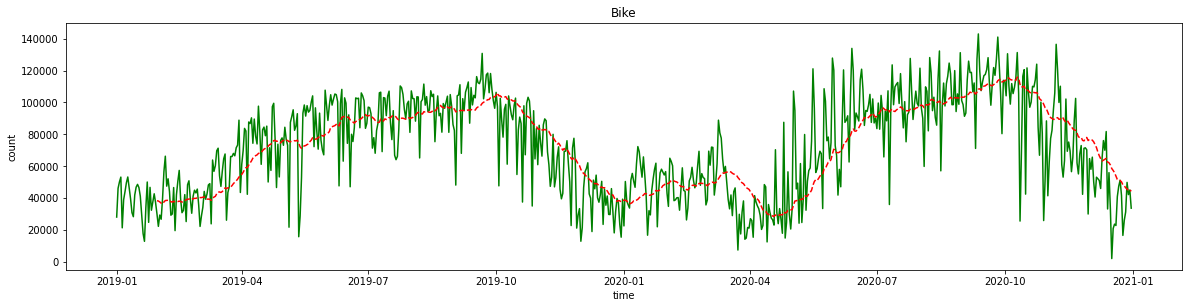

In [170]:
# get the number of samples
nsamp = len(bikebyday)

print(bikebyday.describe())

xTime = bikebyday['date']
yGreen = bikebyday['riders']

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Bike')
plt.xlabel('time')
plt.ylabel('count')
Bike_data_line = plt.plot(xTime, yGreen, label='Green', color='green')
Bike_mean_line = plt.plot(xTime, yGreen.rolling(window=30).mean(), label='Green Mean', linestyle='--',color='red')


            month         riders    avg_dist  avg_duration
count  731.000000     731.000000  731.000000    731.000000
mean     6.519836   71658.816689    5.953685     58.597990
std      3.451913   30684.204777    4.600603     50.314638
min      1.000000    1933.000000    0.025365      0.524553
25%      4.000000   45921.000000    3.635303     34.134925
50%      7.000000   71311.000000    4.928599     46.282475
75%     10.000000   98550.000000    6.660133     65.011987
max     12.000000  143058.000000   40.735195    529.502116


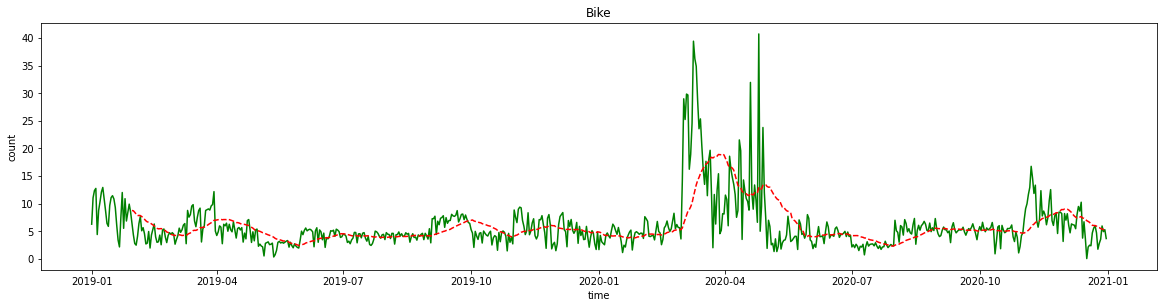

In [171]:
# get the number of samples
nsamp = len(bikebyday)

print(bikebyday.describe())

xTime = bikebyday['date']
yGreen = bikebyday['avg_dist']

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Bike')
plt.xlabel('time')
plt.ylabel('count')
Bike_data_line = plt.plot(xTime, yGreen, label='Green', color='green')
Bike_mean_line = plt.plot(xTime, yGreen.rolling(window=30).mean(), label='Green Mean', linestyle='--',color='red')


            month         riders    avg_dist  avg_duration
count  731.000000     731.000000  731.000000    731.000000
mean     6.519836   71658.816689    5.953685     58.597990
std      3.451913   30684.204777    4.600603     50.314638
min      1.000000    1933.000000    0.025365      0.524553
25%      4.000000   45921.000000    3.635303     34.134925
50%      7.000000   71311.000000    4.928599     46.282475
75%     10.000000   98550.000000    6.660133     65.011987
max     12.000000  143058.000000   40.735195    529.502116


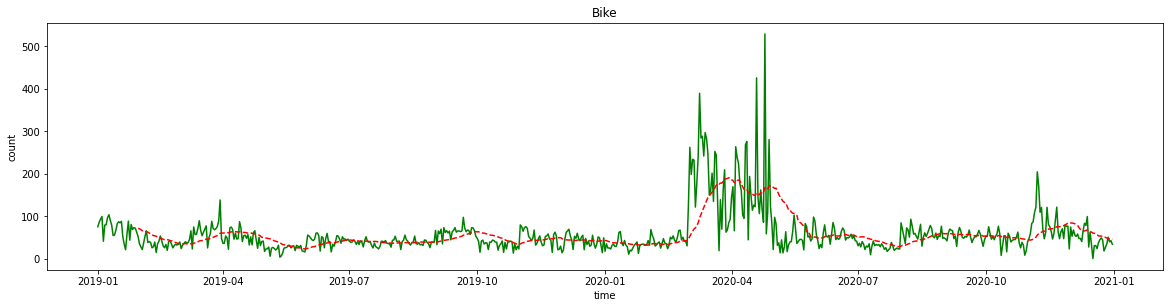

In [172]:
# get the number of samples
nsamp = len(bikebyday)

print(bikebyday.describe())

xTime = bikebyday['date']
yGreen = bikebyday['avg_duration']

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.title('Bike')
plt.xlabel('time')
plt.ylabel('count')
Bike_data_line = plt.plot(xTime, yGreen, label='Green', color='green')
Bike_mean_line = plt.plot(xTime, yGreen.rolling(window=30).mean(), label='Green Mean', linestyle='--',color='red')


In [60]:
bike2019.head()

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration
0,2019,1,1,0,133,1.034025,7.179412
1,2019,1,1,1,311,1.975756,15.400700
2,2019,1,1,2,355,2.119052,16.676541
3,2019,1,1,3,251,1.213358,10.979902
4,2019,1,1,4,153,0.836879,6.104062


In [74]:
bike2019peak_morn = bike2019[(bike2019['hour']==8) | (bike2019['hour']==9)]
bike2019peak_morn

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration
8,2019,1,1,8,431,2.525521,19.544118
9,2019,1,1,9,633,3.634896,29.197829
32,2019,1,2,8,4569,32.928918,221.477031
33,2019,1,2,9,3367,18.301655,147.863655
56,2019,1,3,8,5552,41.173539,316.123669
...,...,...,...,...,...,...,...
8697,2019,12,29,9,1252,3.947011,32.535432
8720,2019,12,30,8,914,2.913298,18.619319
8721,2019,12,30,9,817,2.363472,16.243705
8744,2019,12,31,8,2017,7.174030,49.048219


In [83]:
bike2019peak_morngrp = bike2019peak_morn[['month','concurrent_riders']].groupby(['month'], as_index=False).agg({'concurrent_riders':'sum'}).rename(columns={'concurrent_riders':'ridership_2019'})
bike2019peak_morngrp

,month,ridership_2019
0,1,189554
1,2,180048
2,3,225432
3,4,314406
4,5,335195
5,6,319806
6,7,357064
7,8,382733
8,9,410848
9,10,391031


In [71]:
bike2020peak_morn = bike2020[(bike2020['hour']==8) | (bike2020['hour']==9)]
bike2020peak_morn

,year,month,day,hour,concurrent_riders,avg_distance,avg_trip_duration
8768,2020,1,1,8,417,0.732799,5.249684
8769,2020,1,1,9,598,1.020667,7.401676
8792,2020,1,2,8,4211,10.323511,64.871939
8793,2020,1,2,9,3442,6.774209,46.005637
8816,2020,1,3,8,2367,5.188868,33.019752
...,...,...,...,...,...,...,...
17481,2020,12,29,9,2150,6.100107,56.186196
17504,2020,12,30,8,1824,5.797366,36.556966
17505,2020,12,30,9,2112,6.242894,43.346374
17528,2020,12,31,8,464,1.176445,8.266794


In [84]:
bike2020peak_morngrp = bike2020peak_morn[['month','concurrent_riders']].groupby(['month'], as_index=False).agg({'concurrent_riders':'sum'}).rename(columns={'concurrent_riders':'ridership_2020'})
bike2020peak_morngrp

,month,ridership_2020
0,1,235163
1,2,210904
2,3,166997
3,4,57575
4,5,118370
5,6,199126
6,7,254286
7,8,249464
8,9,284760
9,10,269044


In [89]:
bikepeak_morn = pd.DataFrame({"Month": bike2019peak_morngrp['month'],"Morning_Peak_2019": bike2019peak_morngrp['ridership_2019'], "Morning_Peak_2020": bike2020peak_morngrp['ridership_2020']})
bikepeak_morn

,Month,Morning_Peak_2019,Morning_Peak_2020
0,1,189554,235163
1,2,180048,210904
2,3,225432,166997
3,4,314406,57575
4,5,335195,118370
5,6,319806,199126
6,7,357064,254286
7,8,382733,249464
8,9,410848,284760
9,10,391031,269044


<AxesSubplot:xlabel='Month'>

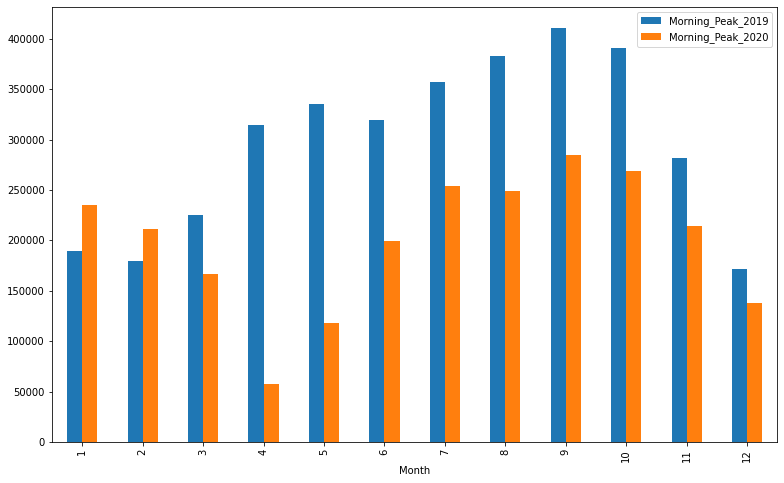

In [98]:
bikepeak_morn[['Month','Morning_Peak_2019','Morning_Peak_2020']].plot.bar(x='Month', figsize=(13,8))

In [93]:
bike2019peak_eve = bike2019[(bike2019['hour']==17) | (bike2019['hour']==18)]
bike2019peak_evegrp = bike2019peak_eve[['month','concurrent_riders']].groupby(['month'], as_index=False).agg({'concurrent_riders':'sum'}).rename(columns={'concurrent_riders':'ridership_2019'})
bike2019peak_evegrp

,month,ridership_2019
0,1,214133
1,2,211290
2,3,318856
3,4,432881
4,5,462364
5,6,506649
6,7,516033
7,8,550630
8,9,599129
9,10,499229


In [94]:
bike2020peak_eve = bike2020[(bike2020['hour']==17) | (bike2020['hour']==18)]
bike2020peak_evegrp = bike2020peak_eve[['month','concurrent_riders']].groupby(['month'], as_index=False).agg({'concurrent_riders':'sum'}).rename(columns={'concurrent_riders':'ridership_2020'})
bike2020peak_evegrp

,month,ridership_2020
0,1,275175
1,2,254006
2,3,284661
3,4,202095
4,5,435253
5,6,518483
6,7,521523
7,8,605044
8,9,662413
9,10,567075


In [95]:
bikepeak_eve = pd.DataFrame({"Month": bike2019peak_evegrp['month'],"Evening_Peak_2019": bike2019peak_evegrp['ridership_2019'], "Evening_Peak_2020": bike2020peak_evegrp['ridership_2020']})
bikepeak_eve

,Month,Evening_Peak_2019,Evening_Peak_2020
0,1,214133,275175
1,2,211290,254006
2,3,318856,284661
3,4,432881,202095
4,5,462364,435253
5,6,506649,518483
6,7,516033,521523
7,8,550630,605044
8,9,599129,662413
9,10,499229,567075


<AxesSubplot:xlabel='Month'>

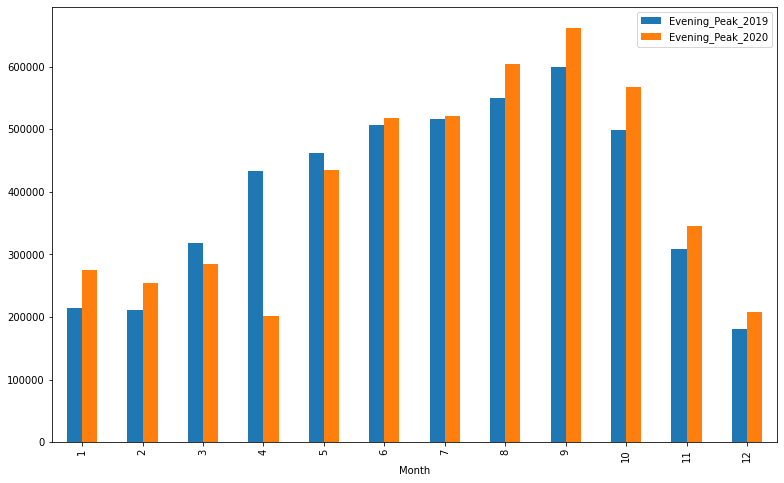

In [99]:
bikepeak_eve[['Month','Evening_Peak_2019','Evening_Peak_2020']].plot.bar(x='Month', figsize=(13,8))